<div style="text-align:center">
    <h1>
        n-step SARSA
    </h1>
</div>

<br><br>

<div style="text-align:center">
    We are going to combine the temporal difference method SARSA with n-step bootstrapping. The resulting algorithm is called n-step SARSA and uses the following target for the updates:
</div>

\begin{equation}
\hat G_t = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{n} + \gamma Q(S_n, A_n)
\end{equation}

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_action_values, test_agent

## Create the environment, value table and policy

#### Create the environment

In [2]:
env = Maze()

#### Create the $Q(s, a)$ table

In [3]:
action_values = np.zeros(shape=(5, 5, 4))

#### Create the policy $\pi(s)$

In [4]:
def policy(state, epsilon=0.):
    if np.random.random() < epsilon:
        return np.random.randint(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

#### Plot the value table $Q(s,a)$

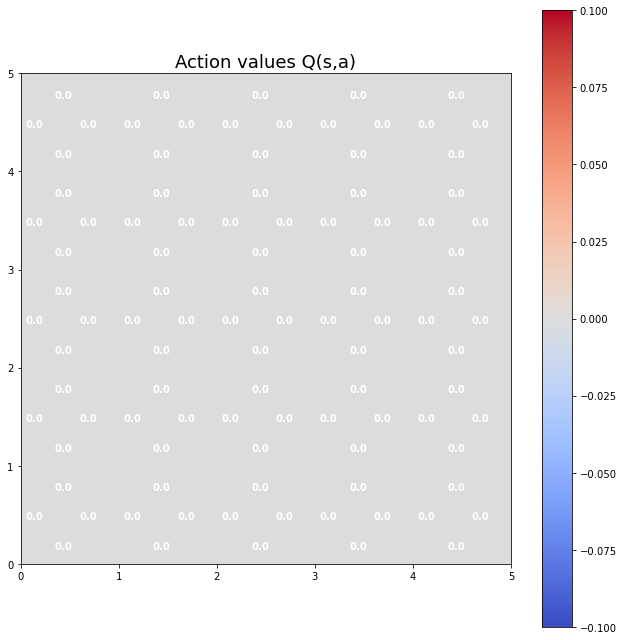

In [5]:
plot_action_values(action_values)

#### Plot the policy

2022-08-25 07:34:51.392 python[1514:44084] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9bcbf6bd70>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:34:51.393 python[1514:44084] Warning: Expected min height of view: (<NSButton: 0x7f9bcbf8faf0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:34:51.395 python[1514:44084] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9bcbf7d610>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.
2022-08-25 07:34:51.397 python[1514:44084] Warning: Expected min height of view: (<NSPopoverTouchBarItemButton: 0x7f9bcbf92400>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


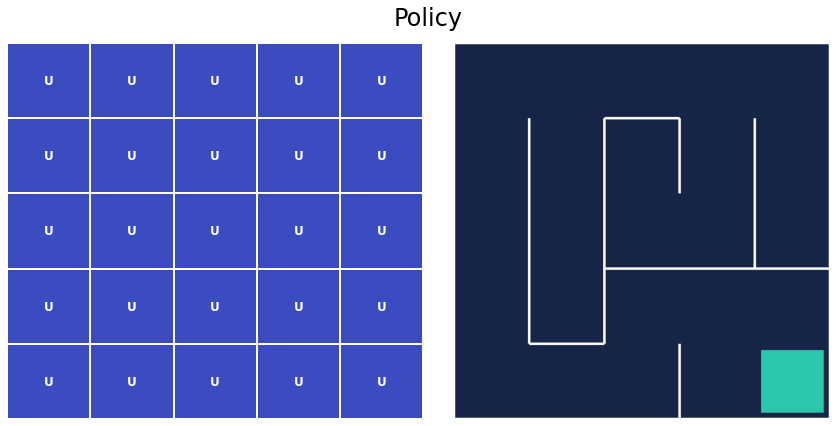

In [6]:
plot_policy(action_values, env.render(mode='rgb_array'))

## Implement the algorithm

</br>

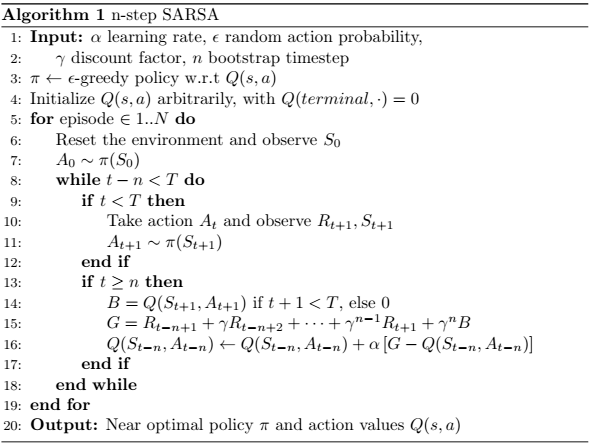

In [7]:
def n_step_sarsa(action_values, policy, episodes, alpha=0.1, gamma=0.99, epsilon=0.2, n=8):
    
    for episode in range(1, episodes + 1):
        state = env.reset()
        action = policy(state, epsilon)
        transitions = []
        done = False
        t = 0

        while t-n < len(transitions):
            
            if not done:
                next_state, reward, done, _ = env.step(action)
                next_action = policy(next_state, epsilon)
                transitions.append([state, action, reward])                
        
            if t >= n:
                G = (1 - done) * action_values[next_state][next_action]
                for state_t, action_t, reward_t in reversed(transitions[t-n:]):
                    G = reward_t + gamma * G
                action_values[state_t][action_t] += alpha * (G - action_values[state_t][action_t])
            
            t += 1
            state = next_state
            action = next_action        
            

In [8]:
n_step_sarsa(action_values, policy, 1000)

## Show results

#### Show resulting value table $Q(s, a)$

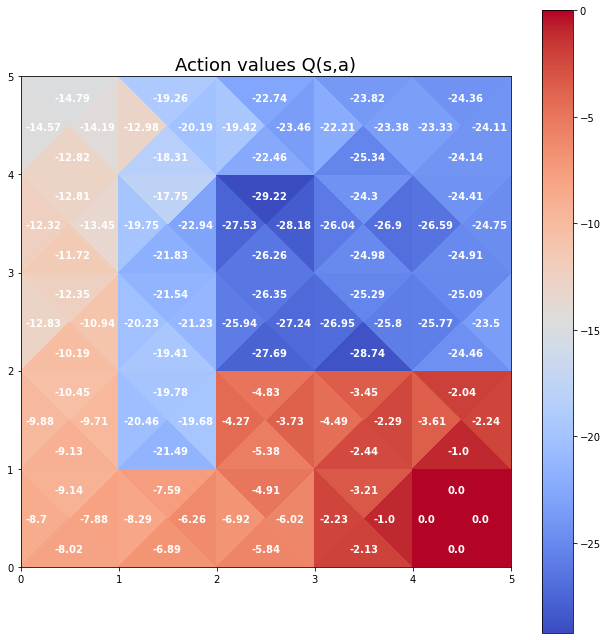

In [9]:
plot_action_values(action_values)

#### Show resulting policy $\pi(\cdot|s)$

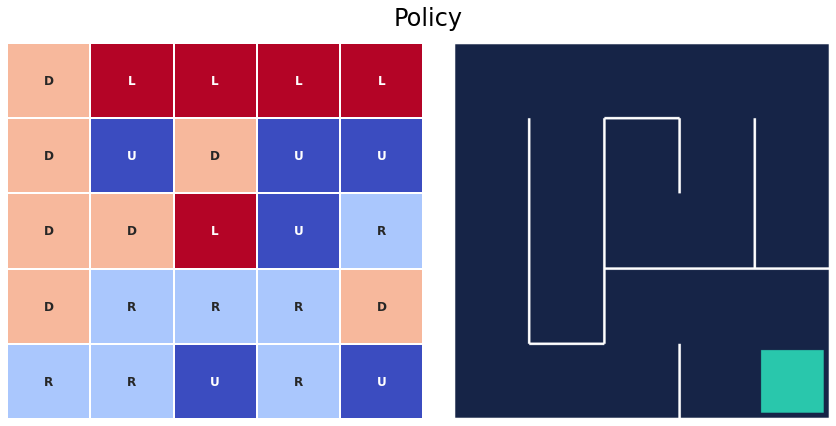

In [10]:
plot_policy(action_values, env.render(mode='rgb_array'))

#### Test the resulting agent

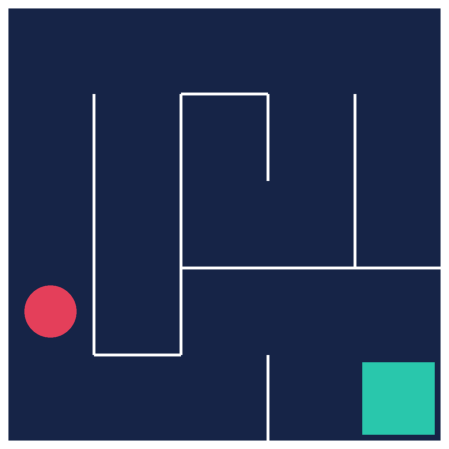

In [ ]:
test_agent(env, policy)